![img](https://github.com/MEmilyGomes/PCD---Criptografia-RSA/assets/172424897/8ab16e3d-9b90-4e14-b4ae-af54178c31fd) 


# <center>Temperatura crítica de materiais supercondutores: aprendizado de máquina</center> 
#### <center>Trabalho Final de Machine Learning - Ilum: Escola de Ciências, Campinas, 2024<center>

___________________

__Autor:__ Andriel Vinícius Martins Silva | andriel24044@ilum.cnpem.br
<br>
__Autor:__ Pedro Coelho Gimenes de Freitas | pedro24033@ilum.cnpem.br
<br>
__Autor:__ Rafael Dalacorte Erdmann | rafael24017@ilum.cnpem.br

____________________

# Sumário

* [I. Introdução](#introducao)
    * [I.I - Dataset](#dataset)
    * [I.II - Tratamento de dados](#tratamento)
* [II. Modelos](#modelos)
    * [II.I - Modelo BaseLine](#baseline)
    * [II.II - Modelos Lineares (LinearRegression e BayesianRidge)](#lineares)
    * [II.III - Modelo dos $k$-vizinhos mais próximos ($k$-NN)](#knn)
    * [II.IV - Modelo de Floresta Aleatória](#floresta)
* [III. Conclusões](#conclusao)
* [IV. Referências](#referencias)


____________________

# <div id="introducao"> I. Introdução

<p style="text-align:justify;">A supercondutividade é um fenômeno associado à condução de corrente elétrica sem resistência em materiais abaixo de uma temperatura crítica específica (TC), isto é, a temperatura máxima na qual um material pode exibir supercondutividade (abaixo dessa temperatura, o material apresenta resistência elétrica zero)<sup><a href="#ref-1">[1]</a></sup>. Nesse sentido, diversas teorias, como a de Bardeen–Cooper–Schrieffer, explicam o surgimento da supercondutividade através da formação de pares de elétrons em estados ressonantes <sup><a href="#ref-2">[2]</a></sup>. Além disso, a manifestação da supercondutividade está diretamente associada à interação entre os elétrons e a rede cristalina do supercondutor, que influencia a dinâmica dos elétrons e a estrutura do material <sup><a href="#ref-3">[3]</a></sup>.

<p style="text-align:justify;">Um exemplo notável desse fenômeno é o uso de materiais supercondutores em aceleradores de partículas, como o Sirius, que permite realizar experimentos complexos em física de partículas e ciência dos materiais. No entanto, a busca por novos materiais supercondutores é frequentemente baseada em regras empíricas, o que pode ser um processo lento e custoso. Uma abordagem promissora para acelerar essa descoberta é a aplicação de técnicas computacionais, como simulações multifísicas, que permitem estudar os efeitos da supercondutividade em diferentes materiais <sup><a href="#ref-4">[4]</a></sup>. Apesar disso, os algoritmos de modelagem baseados em física requerem muitos recursos computacionais, tornando-os inadequados para previsões rápidas.

<p style="text-align:justify;">Nesse contexto, o surgimento de bancos de dados estruturados para materiais tem incentivado o desenvolvimento de modelos preditivos que analisam propriedades físico-químicas de materiais. Assim, a implementação de métodos de aprendizado de máquina pode facilitar a descoberta de novos materiais supercondutores, utilizando dados de materiais já conhecidos. A criação de ferramentas preditivas poderia reduzir os custos de produção de supercondutores com temperaturas críticas específicas e auxiliar os pesquisadores experimentais na busca por propriedades específicas. Ademais, a modelagem preditiva baseada em dados pode minimizar a necessidade de experimentos longos e dispendiosos, bem como simulações complexas baseadas em física que exigem alta demanda computacional. <sup><a href="#ref-5">[5]</a></sup>

<p style="text-align:justify;">À luz desta problemática, este trabalho tem como objetivo apresentar modelos que preveem as temperaturas críticas para materiais supercondutores inorgânicos. Para isso, será utilizado um conjunto de dados que contém informações sobre 21,263 supercondutores inorgânicos, conforme relatado por K. Hamidieh <sup><a href="#ref-1">[1]</a></sup>. Além disso, espera-se comparar os modelos desenvolvidos e discuti-los no contexto de suas potenciais aplicações na ciência de materiais, incluindo sua relevância para projetos como o acelerador de partículas Sirius.

## <div id="dataset"> I.I - Dataset

<p style="text-align:justify;">Neste caderno, utilizaremos o dataset UNIQUE_M

    
<p style="text-align:justify;"><div class="alert alert-danger"><b>Obs: </b>Neste trabalho, utilizou-se um dataset disponível para consulta via python, a partir da biblioteca <b>UCIMLRepo</b>. Se você ainda não tem esta biblioteca instalada em seu dispositivo, execute o comando abaixo no próprio caderno Jupyter ou no console do anaconda:
    <b>!pip install ucimlrepo </b>
    

<p style="text-align:justify;">Inicialmente, é necessário importar o dataset da biblioteca <code>UCIMlRepo</code>. O <i>id</i> da base de dados de supercondutividade utilizada é 464. Após isso, determina-se o target e as features de interesse nas variáveis <code>X</code> e <code>y</code>, respectivamente.

In [7]:
# Para importar a base de dados de supercondutividade, utiliza-se o repositório uciml.

#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 

# Baixar o dataset:
superconductivty_data = fetch_ucirepo(id=464) 

# Isola os atributos e os targets
X = superconductivty_data.data.features 
y = superconductivty_data.data.targets 

In [8]:
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


<p style="text-align:justify;">A base de dados utilizada neste projeto possui 81 colunas de atributos, mas alguns deles representam quantidades semelhantes. Portanto, para obter melhores modelos, analisaremos os atributos quanto à colinearidade dos dados através de um seletor de <i>fator de inflação de variância (VIF).</i> Haja visto a alta demanda computacional para realizar o VIF, utilizaremos os dados do VIF obtidos no caderno "Supercondutividade - Dataset1" (disponível no github).

In [12]:
variaveis = [
    'mean_atomic_mass',
    'wtd_range_atomic_mass',
    'std_atomic_mass',
    'gmean_fie',
    'wtd_range_fie',
    'mean_atomic_radius',
    'wtd_range_atomic_radius',
    'std_atomic_radius',
    'wtd_entropy_Density',
    'range_Density',
    'wtd_range_Density',
    'mean_ElectronAffinity',
    'wtd_gmean_ElectronAffinity',
    'wtd_entropy_ElectronAffinity',
    'range_ElectronAffinity',
    'wtd_std_ElectronAffinity',
    'gmean_FusionHeat',
    'range_FusionHeat',
    'wtd_range_FusionHeat',
    'wtd_std_FusionHeat',
    'mean_ThermalConductivity',
    'wtd_gmean_ThermalConductivity',
    'entropy_ThermalConductivity',
    'wtd_entropy_ThermalConductivity',
    'wtd_range_ThermalConductivity',
    'gmean_Valence',
    'range_Valence',
    'wtd_range_Valence',
    'wtd_std_Valence'
]
X_modificado = X[variaveis]

Agora, importando o outro dataset

In [13]:
import pandas as pd

superconductivty_chem = pd.read_csv("unique_m.csv")

X2 = superconductivty_chem.drop(["critical_temp", "material"], axis=1)

Juntando os dois datasets:

In [14]:
dataset_junto = pd.concat([X_modificado,X2],axis=1)

dataset_junto

,mean_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_entropy_Density,range_Density,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,88.944468,31.794921,51.968828,718.152900,735.985714,160.250000,42.914286,75.237540,0.814598,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,92.729214,36.161939,47.094633,720.605511,743.164286,161.200000,50.571429,67.321319,0.914802,10488.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,88.944468,35.741099,51.968828,718.152900,743.164286,160.250000,49.314286,75.237540,0.760305,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,88.944468,33.768010,51.968828,718.152900,739.575000,160.250000,46.114286,75.237540,0.788889,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,88.944468,27.848743,51.968828,718.152900,728.807143,160.250000,36.514286,75.237540,0.859811,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,106.957877,15.504479,65.764081,651.611213,427.546667,176.500000,57.808889,45.883003,1.110551,7511.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21259,92.266740,7.353333,69.232655,702.115184,659.771429,159.200000,20.285714,67.211309,1.080432,11848.571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
21260,99.663190,53.041104,6.756810,730.207231,370.180000,183.500000,124.600000,14.500000,0.572700,3453.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21261,99.663190,31.115202,6.756810,730.207231,208.799000,183.500000,84.230000,14.500000,0.667210,3453.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [15]:
from sklearn.model_selection  import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(dataset_junto, y.values.ravel(), test_size=0.2, random_state=6969)

<p style="text-align:justify;">Com os dados, utilizaremos alguns modelos de aprendizagem de máquina para encontrar uma solução à problemática.

## <div id="baseline"> II.I - Modelo BaseLine

Utilizamos o **Dummy Regressor** da biblioteca **Scikit-learn** como modelo baseline, definindo sua estratégia como "mean", ou seja, o modelo irá prever a média dos valores de saída.

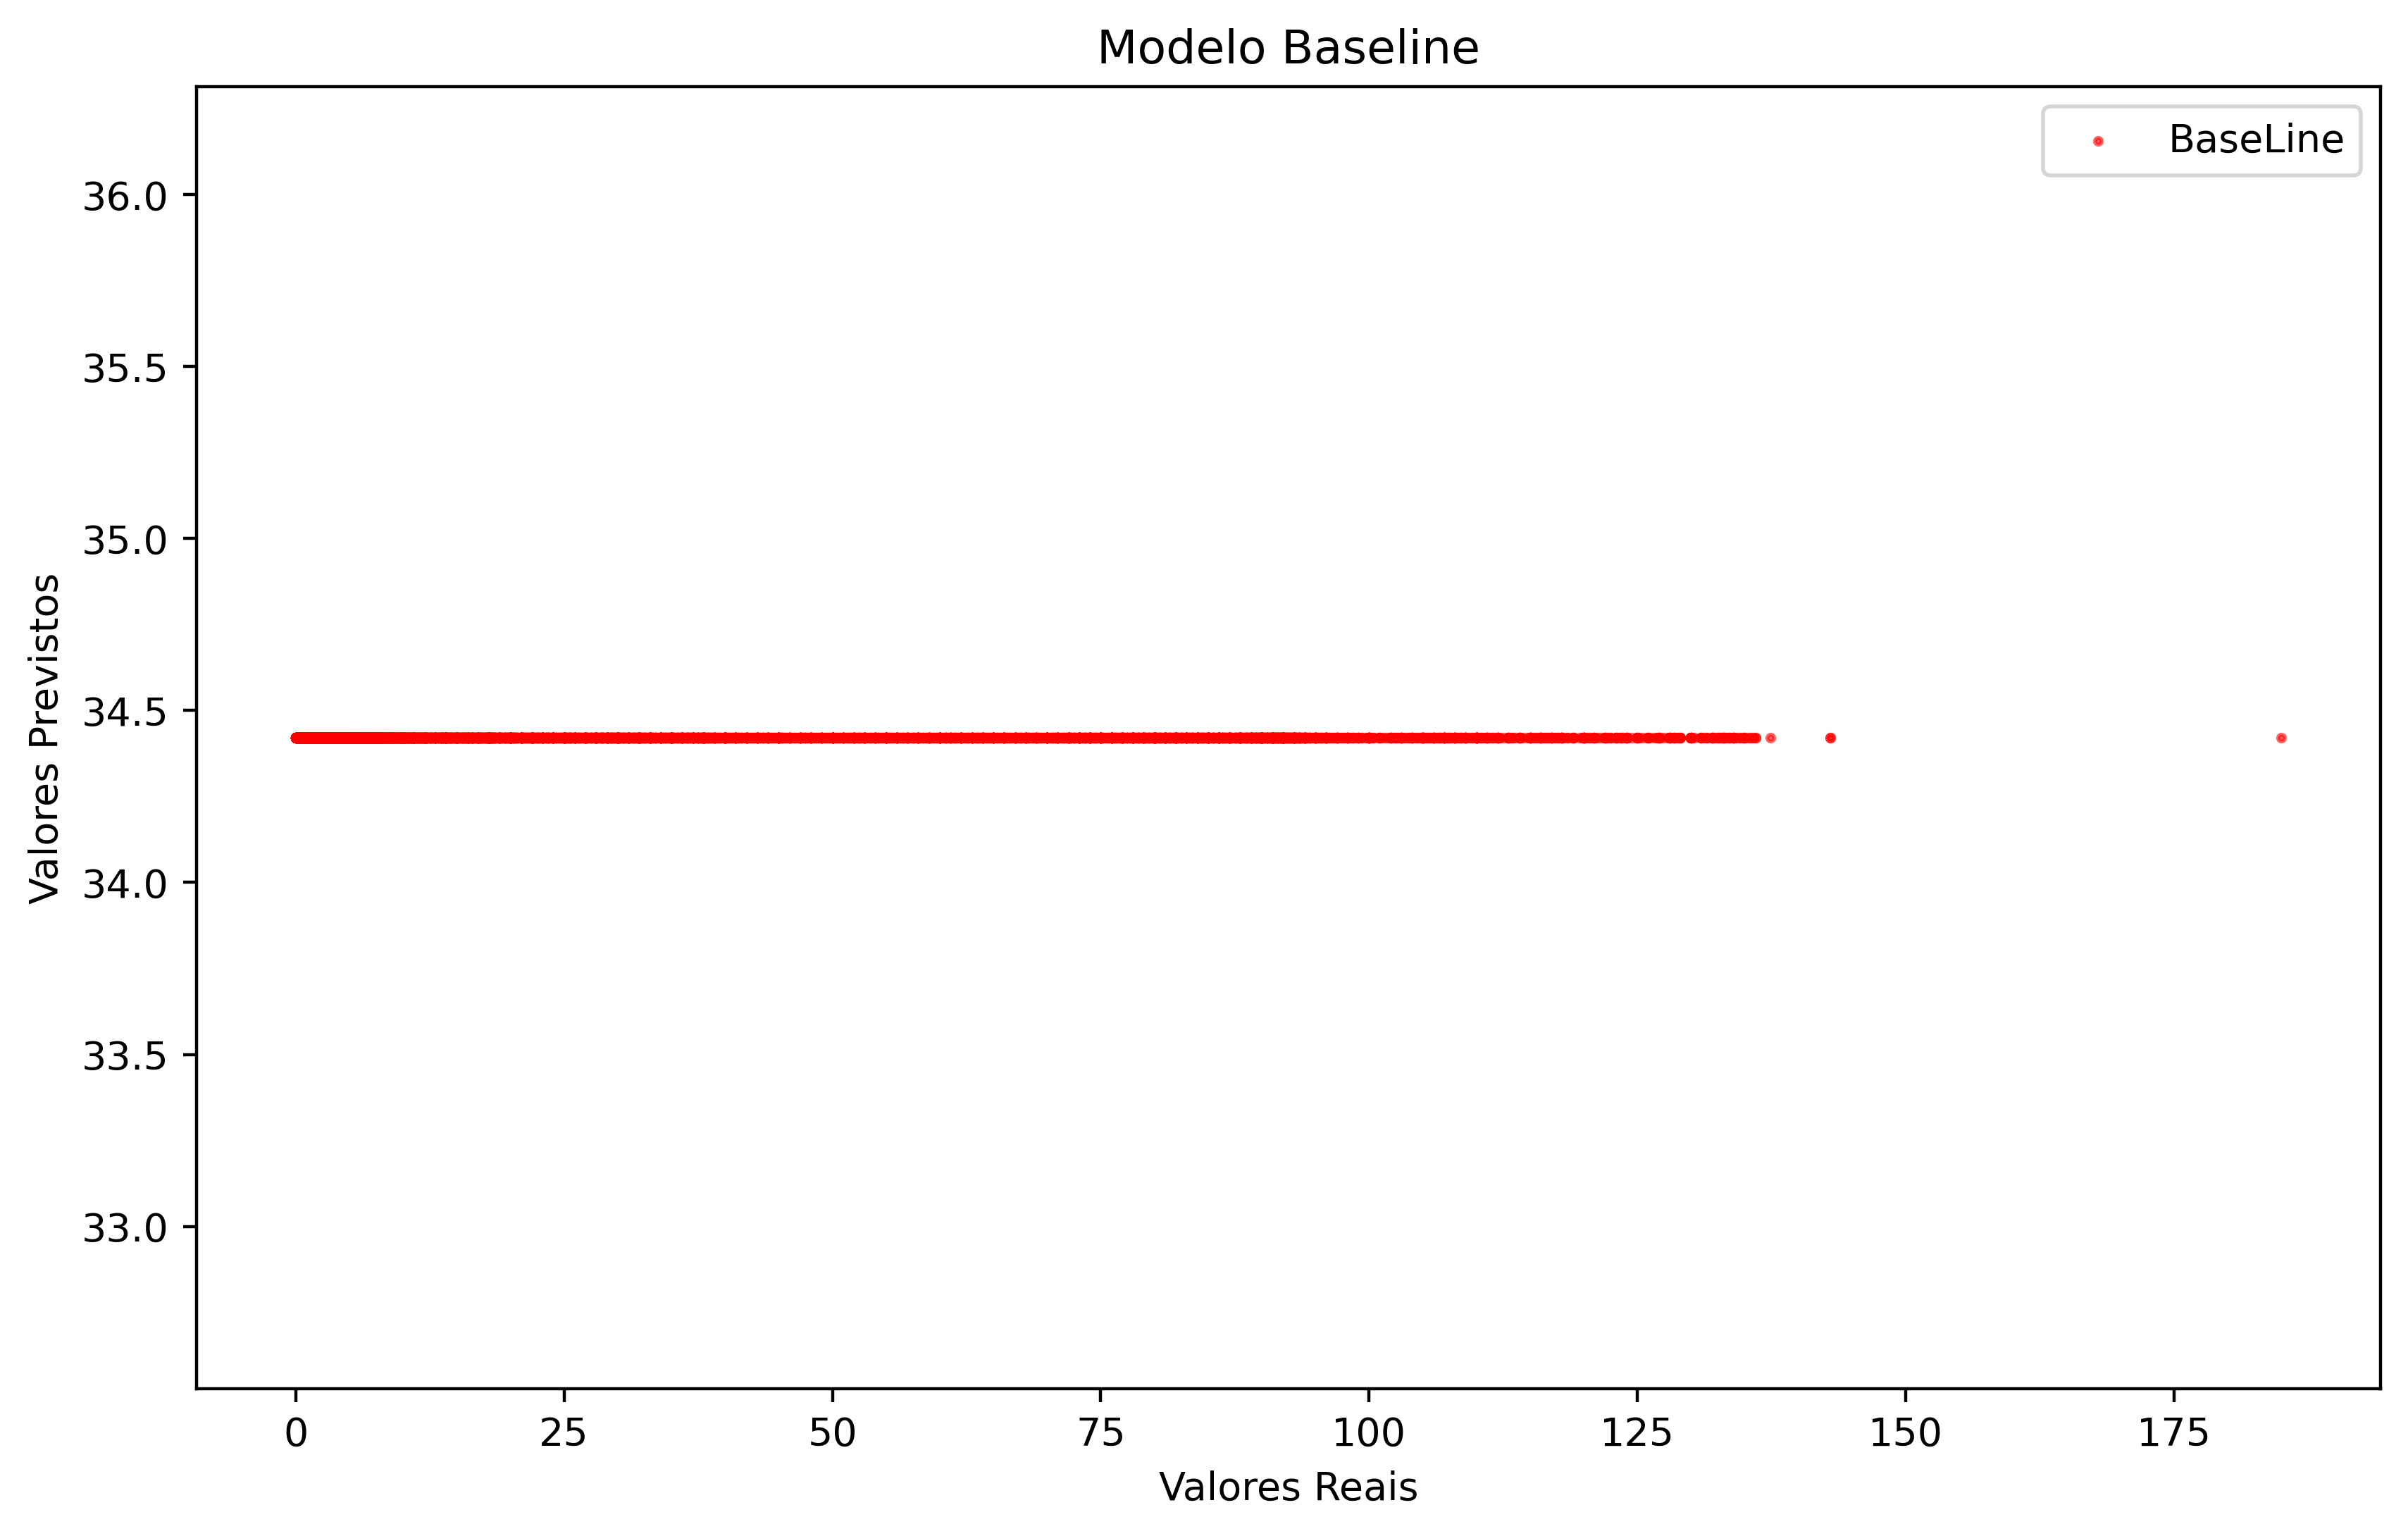

In [16]:
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X,y)

y_baseline = dummy_regr.predict(X)

y_baseline

plt.figure(figsize=(10, 6), dpi=400)

t = plt.scatter(x=y.values.ravel(), y=y_baseline, color='red', label='BaseLine', alpha=0.6,s=3)

plt.title('Modelo Baseline')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.show()

O **RMSE** (Root Mean Squared Error) do modelo baseline foi calculado utilizando a função `mean_squared_error` da biblioteca **Scikit-learn**

In [17]:
from sklearn.metrics import mean_squared_error

RMSE_baseline = mean_squared_error(y, y_baseline, squared=False)

print(f'O RMSE do modelo baseline é de {RMSE_baseline} K')

O RMSE do modelo baseline é de 34.25355694704622 K


## <div id="lineares"> II.II - Modelos Lineares (LinearRegression e BayesianRidge)

Ambos os modelos são ajustados aos dados de treinamento (`X_treino` e `y_treino`) utilizando o método `fit`.

Em seguida, geramos previsões para os dados de treinamento com ambos os modelos. As previsões do modelo linear são armazenadas em `y_previsto_linear`, enquanto as previsões do modelo bayesiano estão em `y_previsto_bayesian`.

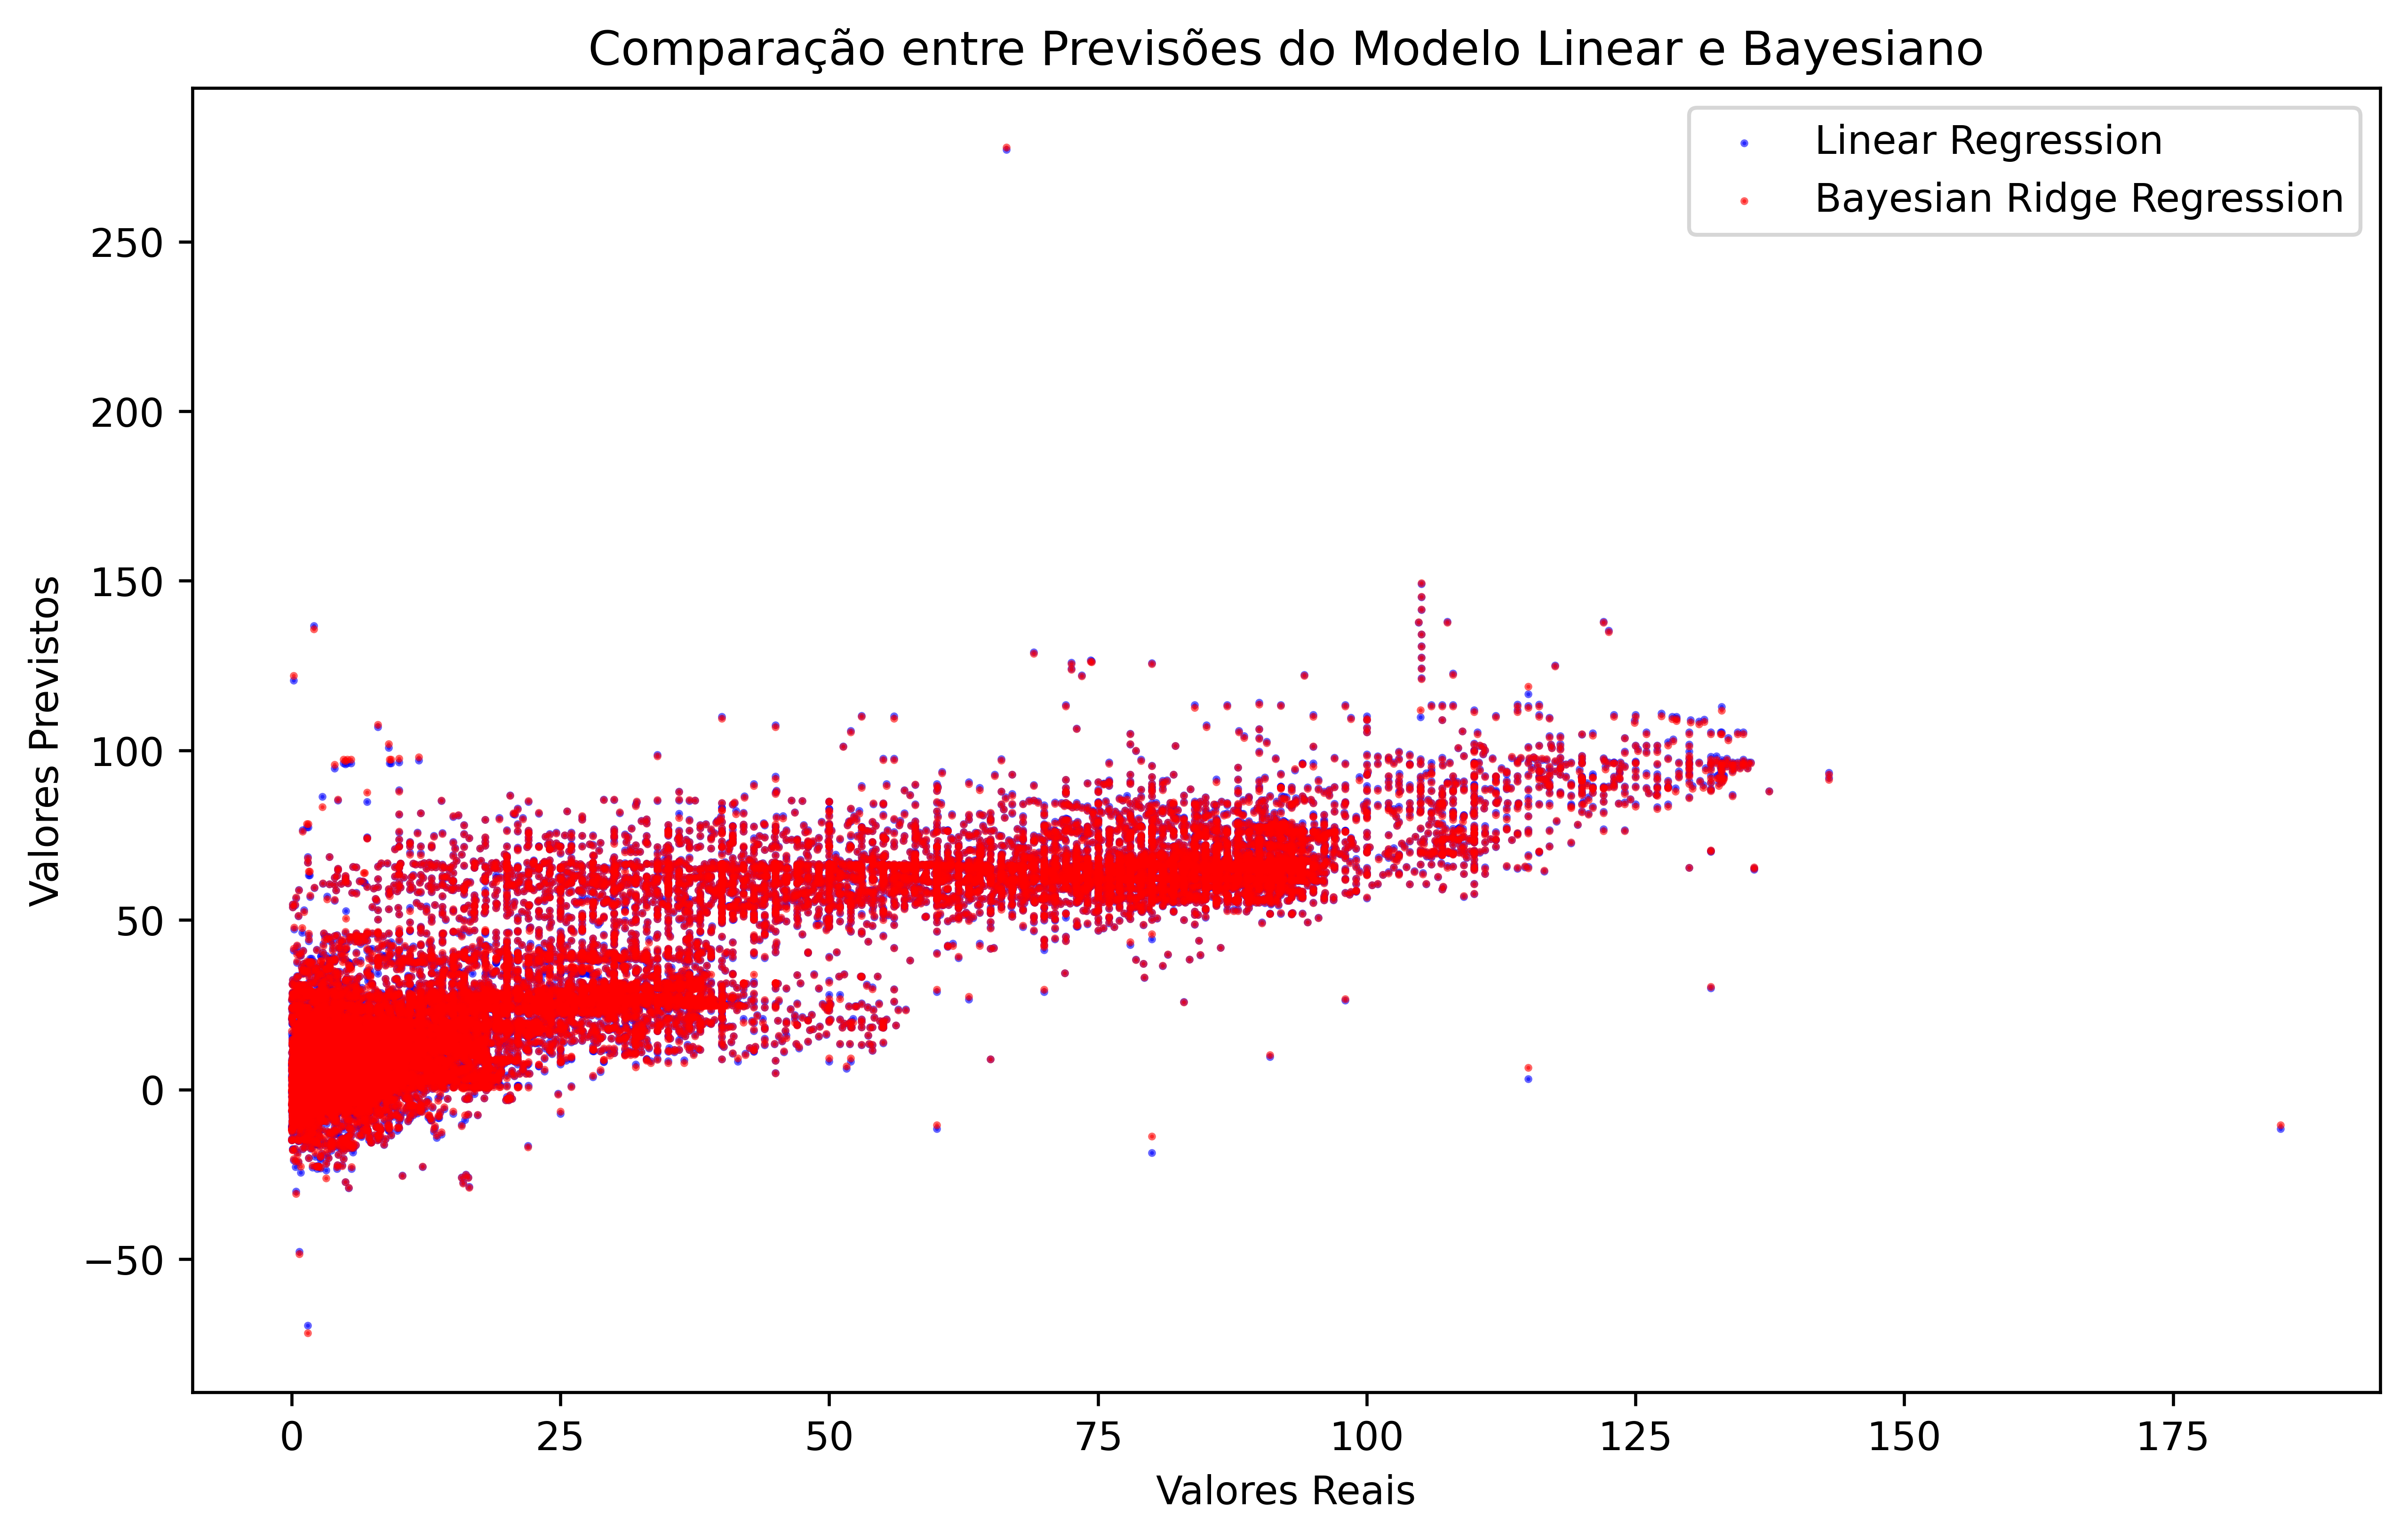

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression

modelo_linear = LinearRegression()
modelo_bayesian = BayesianRidge()

modelo_linear.fit(X_treino, y_treino)
modelo_bayesian.fit(X_treino, y_treino)

y_previsto_bayesian = modelo_bayesian.predict(X_treino)
y_previsto_linear = modelo_linear.predict(X_treino)

plt.figure(figsize=(10, 6), dpi=600)

plt.scatter(y_treino, y_previsto_linear, color='blue', label='Linear Regression', alpha=0.6,s=1)

plt.scatter(y_treino, y_previsto_bayesian, color='red', label='Bayesian Ridge Regression', alpha=0.6,s=1)

plt.title('Comparação entre Previsões do Modelo Linear e Bayesiano')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.show()

O **RMSE** (Root Mean Squared Error) para os modelos de regressão linear e bayesiano foram calculados utilizando a função `mean_squared_error` da biblioteca **Scikit-learn**

In [19]:
from sklearn.metrics import mean_squared_error

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_linear.predict(X_verdadeiro)

RMSE_linear = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo linear foi de {RMSE_linear:0.4f} K")

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_bayesian.predict(X_verdadeiro)

RMSE_bayesiano = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo bayesiano foi de {RMSE_bayesiano:0.4f} K")

O RMSE do modelo linear foi de 18.2168 K
O RMSE do modelo bayesiano foi de 18.2070 K


## <div id="knn"> II.III - Modelo dos $k$-vizinhos mais próximos ($k$-NN)

<p style="text-align:justify;"> Para evitar calcular cada regressor com os possíveis números de vizinhos próximos, utilizaremos a biblioteca <code>Optuna</code><sup><a href="#ref-10">[10]</a></sup>, que facilita o mapeamento de hiperparâmetros através de buscas bayesianas mais inteligentes. No geral essa biblioteca é útil quando tratando de mais de um hiperparâmetro ao mesmo tempo, mas aqui iremos focar apenas no número de vizinhos.

In [20]:
from sklearn.neighbors import KNeighborsRegressor


def cria_instancia_knn(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.

    """
    parametros = {
        "n_neighbors": trial.suggest_int("num_vizinhos", 1, 100),
        "n_jobs": -1,
    }

    model = KNeighborsRegressor(**parametros)

    return model

from sklearn.model_selection import cross_val_score

def funcao_objetivo_knn(trial, X, y, num_folds):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451

    """
    modelo = cria_instancia_knn(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    #retorno negativo pelo comportamento padrão do scikit-learn em considerar a maior métrica como a melhor métrica
    return -metricas.mean()

In [24]:
"""Caso necessário, a biblioteca Optuna pode ser instalada pela linha abaixo"""
#!pip install optuna

from optuna import create_study

NOME_DO_ESTUDO = "knn-superconduct-unique-m"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-10-21 00:52:52,783] Using an existing study with name 'knn-superconduct-unique-m' instead of creating a new one.


O Optuna fará 100 tentativas para encontrar os melhores hiperparâmetros. O método `optimize` executa a função objetivo e ajusta o modelo de acordo com as tentativas. 

O arquivo gerado por meio do optuna encontra-se disponível para download em: [optuna KNN](https://github.com/Andriel24044/SuperCondutividade-ML/blob/main/Otimiza%C3%A7%C3%A3o%20de%20Hiperpar%C3%A2metros/Terceiro%20Dataset/knn-superconductivty_ambos_datasets.db)

Após a otimização, recuperamos o melhor conjunto de parâmetros com `best_trial`.

In [36]:
NUM_FOLDS = 10

def funcao_objetivo_parcial(trial):
    return funcao_objetivo_knn(trial, X_treino, y_treino, NUM_FOLDS)

NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

df = objeto_de_estudo.trials_dataframe()
df = df.dropna()

df

[I 2024-10-21 01:02:33,066] Trial 2 finished with value: 15.998483255080078 and parameters: {'num_vizinhos': 20}. Best is trial 0 with value: 13.447207396613479.


,number,value,datetime_start,datetime_complete,duration,params_critério,params_min_exemplos_folha,params_min_exemplos_split,params_num_arvores,params_num_max_atributos,params_num_vizinhos,state


In [37]:
melhores_vizinhos = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhores_vizinhos.number}")
print(f"Número de vizinhos do melhor trial: {melhores_vizinhos.params}")

Número do melhor trial: 0
Número de vizinhos do melhor trial: {'num_arvores': 80, 'critério': 'poisson', 'min_exemplos_split': 17, 'min_exemplos_folha': 14, 'num_max_atributos': 0.03515280029044798}


O **RMSE** (Root Mean Squared Error) do modelo baseline foi calculado utilizando a função `mean_squared_error` da biblioteca **Scikit-learn**

In [38]:
from sklearn.metrics import mean_squared_error

rmse_previsto = list()
modelo_knn = KNeighborsRegressor(n_neighbors=2)

modelo_knn.fit(X_treino, y_treino)
y_previsto = modelo_knn.predict(X_teste)

RMSE_knn = mean_squared_error(y_teste, y_previsto) ** (1/2)

print(f'O valor do RMSE para o modelo de k-NN foi de, aproximadamente, {RMSE_knn:0.4f} K')

O valor do RMSE para o modelo de k-NN foi de, aproximadamente, 12.7433 K


## <div id="floresta"> II.IV - Modelo de Floresta Aleatória

A função `cria_instancia_floresta` ajusta os hiperparâmetros do modelo com o **Optuna**, como o número de árvores e o critério de divisão, buscando equilibrar desempenho e generalização. A função `funcao_objetivo_floresta` aplica validação cruzada com 10 folds, e o **RMSE** negativo é usado como métrica, já que o objetivo é minimizar o erro.

O estudo é criado e armazenado em um banco de dados SQLite, permitindo reuso dos resultados, com `random_state` fixo para garantir reprodutibilidade.

In [30]:
from sklearn.ensemble import RandomForestRegressor

def cria_instancia_floresta(trial):
    parametros = {
        
        "n_estimators": trial.suggest_int("num_arvores", 10, 100),
        "criterion": trial.suggest_categorical(
            "critério", ["squared_error", "friedman_mse", "poisson"]
        ),
        "min_samples_split": trial.suggest_int(
            "min_exemplos_split", 2, 20, log=True
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_exemplos_folha", 1, 20, log=True
        ),
        "max_features": trial.suggest_float("num_max_atributos", 0, 1),
        "n_jobs": -1,
        "bootstrap": True,
        "random_state": seed,
    }

    model = RandomForestRegressor(**parametros)

    return model

def funcao_objetivo_floresta(trial, X, y, num_folds):
    
    modelo = cria_instancia_floresta(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    return -metricas.mean()


NOME_DO_ESTUDO = "random_forest_supercond_ambos"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

NUM_FOLDS = 10
seed = 696969

def funcao_objetivo_parcial(trial):
    return funcao_objetivo_floresta(trial, X_treino, y_treino, NUM_FOLDS)

[I 2024-10-21 00:54:06,101] A new study created in RDB with name: random_forest_supercond_ambos


Novamente, o Optuna fará 100 tentativas para encontrar os melhores hiperparâmetros. O método `optimize` executa a função objetivo e ajusta o modelo de acordo com as tentativas.

O arquivo gerado por meio do optuna encontra-se disponível para download em: [optuna Random Forest](https://github.com/Andriel24044/SuperCondutividade-ML/blob/main/Otimiza%C3%A7%C3%A3o%20de%20Hiperpar%C3%A2metros/Terceiro%20Dataset/random_forest_supercond_ambos.db)

Após a otimização, recuperamos o melhor conjunto de parâmetros com `best_trial`.

In [31]:
NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

[I 2024-10-21 00:54:29,169] Trial 0 finished with value: 13.447207396613479 and parameters: {'num_arvores': 80, 'critério': 'poisson', 'min_exemplos_split': 17, 'min_exemplos_folha': 14, 'num_max_atributos': 0.03515280029044798}. Best is trial 0 with value: 13.447207396613479.


Número do melhor trial: 0
Parâmetros do melhor trial: {'num_arvores': 80, 'critério': 'poisson', 'min_exemplos_split': 17, 'min_exemplos_folha': 14, 'num_max_atributos': 0.03515280029044798}


Utilizamos os hiperparâmetros obtidos anteriormente para criar uma nova instância do modelo com `cria_instancia_floresta(melhor_trial)`. Em seguida, o modelo é treinado com os dados de treinamento (`X_treino` e `y_treino`) usando o método `fit`.

Após o treinamento, fazemos previsões sobre os dados de teste (`X_teste`) e calculamos o **RMSE** (Root Mean Squared Error) com a função `mean_squared_error`, comparando os valores previstos (`y_previsao`) com os valores reais (`y_verdadeiro`).

In [32]:
modelo = cria_instancia_floresta(melhor_trial)
modelo.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste)

RMSE_floresta = mean_squared_error(y_verdadeiro, y_previsao) ** (1/2)

print(f'O RMSE da floresta aleatória foi {RMSE_floresta} K')

O RMSE da floresta aleatória foi 13.116750865885162 K


____________________

# <div id="conclusao"> III. Conclusões

Neste projeto, utilizamos os algoritmos de aprendizado de máquina — linear, bayesiano, KNN e Random Forest — para prever a temperatura crítica de materiais supercondutores com base nos átomos que os compõem e outras caracteristicas obtidas experimentalmente, comparando seus **RMSEs** para avaliar a eficácia. Com um **RMSE de 9.03719**, o modelo **Random Forest** apresentou o melhor desempenho entre os algoritmos avaliados. No entanto, esse valor ainda é insatisfatório, considerando que se trata de previsões de temperatura crítica. 

Em relação ao tratamento de dados, não foi possível eliminar atributos devido à natureza individualizada dos dados (átomos), o que representa um desafio fora da nossa experiência acadêmica. Essa limitação destaca a complexidade do problema e a necessidade de abordagens mais robustas no tratamento de dados atômicos.

Assim, como o uso de apenas átomos como atributos não resultou em um desempenho satisfatório, este também não se mostrou uma melhor via para o modelo.

____________________

# <div id="referencias"> IV. Referências

<div id="ref-1" style="text-align: justify;">
    <b>[1]</b> Hamidieh, K. (2018). A data-driven statistical model for predicting the critical temperature of a superconductor. Computational Materials Science, 154, 346-354. Disponível em: <a href="https://doi.org/10.1016/j.commatsci.2018.07.052">https://doi.org/10.1016/j.commatsci.2018.07.052</a>
</div>
</br>
<div id="ref-2" style="text-align: justify;">
    <b>[2]</b> Bardeen, J., Rickayzen, G., & Tewordt, L. (1959). Theory of the thermal conductivity of superconductors. Physical Review, 113(5), 982–994. Disponível em: <a href="https://doi.org/10.1103/PhysRev.113.982">https://doi.org/10.1103/PhysRev.113.982</a>
</div>
</br>
<div id="ref-3" style="text-align: justify;">
    <b>[3]</b> Stanev, V., Oses, C., Kusne, A. G., Rodriguez, E., Paglione, J., Curtarolo, S., & Takeuchi, I. (2018). Machine learning modeling of superconducting critical temperature. npj Computational Materials. Disponível em: <a href="https://doi.org/10.1038/s41524-018-0085-8">https://doi.org/10.1038/s41524-018-0085-8</a>
</div>
</br>
<div id="ref-4" style="text-align: justify;">
    <b>[4]</b> Kononenko, O., Adolphsen, C., Li, Z., Ng, C.-K., & Rivetta, C. (2017). 3D multiphysics modeling of superconducting cavities with a massively parallel simulation suite. Physical Review Accelerators and Beams, 20(10), 102001. Disponível em: <a href="https://doi.org/10.1103/PhysRevAccelBeams.20.102001">https://doi.org/10.1103/PhysRevAccelBeams.20.102001</a>
</div>
</br>
<div id="ref-5" style="text-align: justify;">
    <b>[5]</b> Tanaka, I., Rajan, K., & Wolverton, C. (2018). Data-centric science for materials innovation. MRS Bulletin, 43(9), 659–663. Disponível em: <a href="https://doi.org/10.1557/mrs.2018.217">https://doi.org/10.1557/mrs.2018.217</a>
</div>

</br>
<div id="ref-6" style="text-align: justify;">
    <b>[6]</b> Cassar, D. (2024). ATP-203 7.1 - Seleção de atributos. Arquivo local.
</div>

</br>
<div id="ref-7" style="text-align: justify;">
    <b>[7]</b> Cassar, D. (2024). ATP-203 3.0 - Modelo linear e baseline. Arquivo local.
</div>

</br>
<div id="ref-8" style="text-align: justify;">
    <b>[8]</b> Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Dufour, L. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Disponível em: <a href='http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf'>http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf</a>
</div>

</br>
<div id="ref-9" style="text-align: justify;">
    <b>[9]</b> Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. Disponível em: <a href='https://doi.org/10.1109/MCSE.2007.55'>https://doi.org/10.1109/MCSE.2007.55</a>
</div>

</br>
<div id="ref-10" style="text-align: justify;">
    <b>[10]</b> Akiba, T., Sano, S., Kawaguchi, K., & Yanase, T. (2019). Optuna: A next-generation hyperparameter optimization framework. Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, 2623-2631. Disponível em: <a href='https://doi.org/10.1145/3292500.3330664'>https://doi.org/10.1145/3292500.3330664</a>
</div>

